In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

from statsmodels.regression.linear_model import OLS
import statsmodels.api as sm
from scipy.stats import chi2_contingency

In [34]:
df = pd.read_csv(r'/Users/bendavid/Desktop/Data/sqf-2019.csv')
df.dropna()
df

,STOP_ID_ANONY,STOP_FRISK_DATE,STOP_FRISK_TIME,YEAR2,MONTH2,DAY2,STOP_WAS_INITIATED,RECORD_STATUS_CODE,ISSUING_OFFICER_RANK,ISSUING_OFFICER_COMMAND_CODE,...,STOP_LOCATION_PRECINCT,STOP_LOCATION_SECTOR_CODE,STOP_LOCATION_APARTMENT,STOP_LOCATION_FULL_ADDRESS,STOP_LOCATION_STREET_NAME,STOP_LOCATION_X,STOP_LOCATION_Y,STOP_LOCATION_ZIP_CODE,STOP_LOCATION_PATROL_BORO_NAME,STOP_LOCATION_BORO_NAME
0,1,1/2/19,14:30:00,2019,January,Wednesday,Based on C/W on Scene,APP,POM,1,...,1,C,(null),230 VESEY STREET,VESEY STREET,979667,199737,(null),PBMS,MANHATTAN
1,2,1/8/19,2:30:00,2019,January,Tuesday,Based on Self Initiated,APP,POM,1,...,1,C,(null),9 WHITE STREET,WHITE STREET,982650,201326,(null),PBMS,MANHATTAN
2,3,1/12/19,16:54:00,2019,January,Saturday,Based on Radio Run,APP,POM,1,...,1,D,(null),131 SPRING STREET,SPRING STREET,984063,203033,(null),PBMS,MANHATTAN
3,4,1/14/19,21:21:00,2019,January,Monday,Based on Radio Run,APP,POM,1,...,1,(,(null),GRAND STREET && 6TH AVE,GRAND STREET,982848,202677,(null),PBMS,MANHATTAN
4,5,1/15/19,18:50:00,2019,January,Tuesday,Based on Radio Run,APP,POM,1,...,1,D,(null),32 THOMPSON STREET,THOMPSON STREET,983100,202705,(null),PBMS,MANHATTAN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13454,13455,12/30/19,13:20:00,2019,December,Monday,Based on Self Initiated,APP,POM,103,...,103,C,(null),SUTPHIN BOULEVARD && 94 AVENUE,SUTPHIN BOULEVARD,1037778,194006,(null),PBQS,QUEENS
13455,13456,1/7/19,2:51:00,2019,January,Monday,Based on Self Initiated,APP,POM,107,...,107,D,(null),JEWEL AVENUE && 147 STREET,JEWEL AVENUE,1033722,205506,(null),PBQS,QUEENS
13456,13457,12/30/19,14:35:00,2019,December,Monday,Based on Radio Run,APP,POM,109,...,109,C,(null),COLLEGE POINT BOULEVARD && 15 AVENUE,COLLEGE POINT BOULEVARD,1026950,225017,(null),PBQN,QUEENS
13457,13458,12/14/19,3:30:00,2019,December,Saturday,Based on Radio Run,APP,SGT,109,...,109,B,(null),COLLEGE POINT BOULEVARD && POPLE AVENUE,COLLEGE POINT BOULEVARD,1030630,213662,(null),PBQN,QUEENS


In [54]:
# Drop nans

df1 = df.dropna(subset=['DEMEANOR_OF_PERSON_STOPPED'])
demeanor = df['DEMEANOR_OF_PERSON_STOPPED']


In [61]:
race = df["SUSPECT_RACE_DESCRIPTION"]
race.value_counts()

BLACK                        7981
WHITE HISPANIC               2742
WHITE                        1215
BLACK HISPANIC               1127
ASIAN / PACIFIC ISLANDER      301
(null)                         85
AMERICAN INDIAN/ALASKAN N       8
Name: SUSPECT_RACE_DESCRIPTION, dtype: int64

In [ ]:
# CALM, NERVOUS,  UPSET, NORMAL, CONFUSED, COOPERATIVE, ANNOYED,

In [82]:
# Create a table 
table = pd.crosstab(index=race, columns=demeanor) 

# Reorder the values 
table = table.reindex(['BLACK', 'WHITE HISPANIC', 'WHITE', 'BLACK HISPANIC', 'ASIAN', 'AMERICAN INDIAN'])
table = table[['COOPERATIVE', 'CALM', 'NORMAL','NERVOUS', 'ANNOYED', 'UPSET', 'AGITATED']]
table.dropna()

DEMEANOR_OF_PERSON_STOPPED,COOPERATIVE,CALM,NORMAL,NERVOUS,ANNOYED,UPSET,AGITATED
SUSPECT_RACE_DESCRIPTION,,,,,,,
BLACK,206.0,2297.0,322.0,733.0,171.0,413.0,197.0
WHITE HISPANIC,97.0,757.0,131.0,320.0,38.0,114.0,56.0
WHITE,32.0,369.0,79.0,145.0,13.0,45.0,16.0
BLACK HISPANIC,38.0,310.0,53.0,144.0,18.0,60.0,20.0


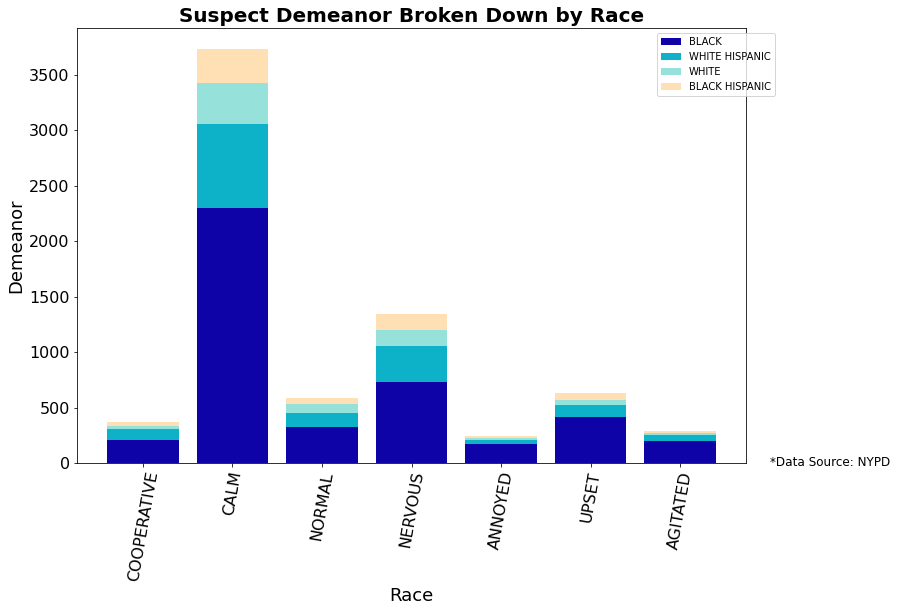

In [93]:
# Plot a stacked bar chart 

label = ['COOPERATIVE', 'CALM', 'NORMAL', 'NERVOUS', 'ANNOYED','UPSET',
                         'AGITATED']

y_value1 = table.loc['BLACK']
y_value2 = table.loc['WHITE HISPANIC']
y_value3 = table.loc['WHITE']
y_value4 = table.loc['BLACK HISPANIC']


fig, axs = plt.subplots(figsize=(12,8)) # Change the figure size        
p1 = axs.bar(label, y_value1, color = '#0d03a6')     
p2 = axs.bar(label, y_value2, bottom=y_value1, color = '#0db1c8')
p3 = axs.bar(label, y_value3, bottom=y_value1+y_value2, color = '#96e2db')
p4 = axs.bar(label, y_value4, bottom=y_value1+y_value2+y_value3, color = '#ffdfb4')

axs.set_title("Suspect Demeanor Broken Down by Race", 
              fontsize=20, fontweight="bold")   
axs.set_xlabel("Race", fontsize=18)
axs.set_ylabel("Demeanor", fontsize=18)
axs.tick_params(labelsize=16)  
plt.xticks(rotation=80)
axs.legend((p1[0],p2[0],p3[0],p4[0]),
           (table.index),
          bbox_to_anchor=(1.05, 1))

plt.text(7, -30, "*Data Source: NYPD", fontsize=12)

plt.show() 